# An effective theory of collective deep learning

Lluís Arola Fernández and Lucas Lacasa

Last modification: October 13, 2023 


-------------


## Data visualization scripts

First, we import packages and load the data from the folder

In [1]:
### Imports
import os 
import pandas as pd
import torch
import torch.nn as nn                               # to access build-in functions to build the NN
import torch.nn.functional as F                     # to access activation functions
from torchvision import datasets, transforms        # to access the MNIST dataset
import torch.optim as optim                         # to build out optimizer
import numpy as np
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns
import sklearn.metrics
import networkx as nx
from sklearn.decomposition import PCA
from IPython.display import clear_output
import time
from numpy import savetxt


We remove inner dots in the names of the files 

In [2]:
import os

def rename_files_in_directory(directory_path):
    # Iterate through all the files in the directory
    for filename in os.listdir(directory_path):
        # Check if the file is a .csv file
        if filename.endswith('.csv'):
            # Split the filename on the last dot
            name_part, extension = filename.rsplit('.', 1)
            
            # Remove all dots in the name part
            new_name_part = name_part.replace('.', '')
            
            # Combine the new name part with the extension
            new_filename = new_name_part + '.' + extension
            
            # Rename the file
            os.rename(os.path.join(directory_path, filename), os.path.join(directory_path, new_filename))

# Provide the path to the directory containing the files
dir_path = '/Users/lluisarolafernandez/desktop/COLLECTIVE_FIGS/data_collective_02_11_23'
rename_files_in_directory(dir_path)


We load data in dataframes

In [3]:
folder = '/Users/lluisarolafernandez/desktop/COLLECTIVE_FIGS/data_collective_02_11_23'

files = [f for f in os.listdir(folder) if f.endswith('.csv')]

for file in files:
    
    file_path = os.path.join(folder, file)
    df = pd.read_csv(file_path,header=None)
    df_name = file.split('.')[0]
    globals()[df_name] = df

In [445]:
folder = '/Users/lluisarolafernandez/desktop/COLLECTIVE_FIGS/data_collective_16_10_23'

files = [f for f in os.listdir(folder) if f.endswith('.csv')]

for file in files:
    
    file_path = os.path.join(folder, file)
    df = pd.read_csv(file_path,header=None)
    df_name = file.split('.')[0]
    globals()[df_name] = df


### COLLECTIVE BEHAVIOR

We visualize the relevant metrics (magnetization, loss and accuracy) for increasing coupling strength $\sigma$, for the different depths in the model, $D = 0,1,2$. 

We consider a non-adiabatic process (random initial conditions at each value of $\sigma$). Results are averaged over 20 realizations of the process. Parametrization: $B = 32$ (batch size), $\tau = 0.005$ (learning rate), $\gamma = 10^{{-2}}$ (regularization), num_neurons = 20, time_steps = 20000, num_models = 10






[1.00000000e-05 1.61559810e-05 2.61015722e-05 4.21696503e-05
 6.81292069e-05 1.10069417e-04 1.77827941e-04 2.87298483e-04
 4.64158883e-04 7.49894209e-04 1.21152766e-03 1.95734178e-03
 3.16227766e-03 5.10896977e-03 8.25404185e-03 1.33352143e-02
 2.15443469e-02 3.48070059e-02 5.62341325e-02 9.08517576e-02
 1.46779927e-01 2.37137371e-01 3.83118685e-01 6.18965819e-01
 1.00000000e+00 2.52000000e+00 4.04000000e+00 5.56000000e+00
 7.08000000e+00 8.60000000e+00 1.01200000e+01 1.16400000e+01
 1.31600000e+01 1.46800000e+01 1.62000000e+01 1.77200000e+01
 1.92400000e+01 2.07600000e+01 2.22800000e+01 2.38000000e+01
 2.53200000e+01 2.68400000e+01 2.83600000e+01 2.98800000e+01
 3.14000000e+01 3.29200000e+01 3.44400000e+01 3.59600000e+01
 3.74800000e+01 3.90000000e+01]


/var/folders/c5/kk81kmh50gn9bq1kf4_4mqhm0000gn/T/ipykernel_50993/2152671782.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


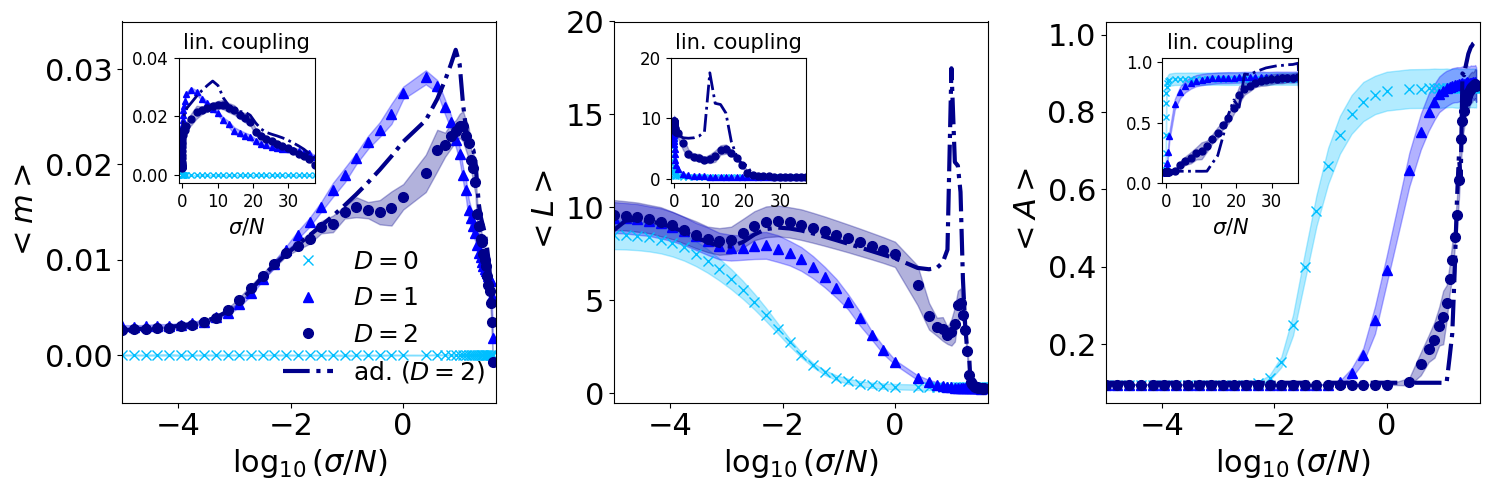

In [339]:
coupling0 = np.logspace(-4,1,25)
coupling1 = np.linspace(10,390,26)
coupling = np.concatenate((coupling0,coupling1[1:]))/10
print(coupling)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def get_data(folder, gamma_value, metric):
    """
    Returns a list of dataframes for the given gamma and metric.
    """
    dfs = []
    for run in range(1, runs):  # 5 realizations
        file_name = f"{metric}_batch32_tau0005_gamma{gamma_value}_neurons20_sigma50_adiabatic0_steps20000_run{run}.csv"
        file_path = os.path.join(folder, file_name)
        dfs.append(pd.read_csv(file_path, header=None))
    return dfs

#def plot_for_gamma_and_metric(ax, folder, gamma_value, metric,runs):
    
def plot_for_gamma_and_metric(ax, folder, gamma_value, metric, runs, adiabatic_data=None):
    # The function logic stays the same, but we'll plot directly to the given axes `ax`.

    data = get_data(folder, gamma_value, metric)
    depths = [0, 1, 2]
    colors = ['deepskyblue', 'blue', 'darkblue']
    markers = ['x','^','o']
    
    for depth, color in zip(depths, colors):
        values = [df[depth] for df in data]
        mean_values = sum(values) / runs
        std_values = pd.concat(values, axis=1).std(axis=1)
        mean_values_adiabatic = adiabatic_data[:,depth]
        
        ax.plot(np.log10(coupling), mean_values, color=color, label=f"$D = {depth}$",marker=markers[depth],linestyle='',markersize=7)
        ax.fill_between(np.log10(coupling), mean_values-std_values, mean_values+std_values, color=color, alpha=0.3)
        #ax.plot(np.log10(coupling), mean_values_adiabatic, color=color, linestyle='-.',linewidth=2)

            
        if depth == 2:
            ax.plot(np.log10(coupling[0:49]), mean_values_adiabatic[0:49], color=color, label="ad. $(D = 2)$", marker='None', linestyle='-.',linewidth=3)
        #else:
        #    ax.plot(np.log10(coupling), mean_values_adiabatic, color=color, marker='None', linestyle='-.',linewidth=2)



            
            
    ax.tick_params(axis='both', which='major', labelsize=22)
    #ax.set_xlim(-10,350)
    ax.set_xlim(-5,1.66)
    #ax.set_title(f"{metric.capitalize()}",fontsize=20)
    ax.set_xlabel('$\log_{10}({\sigma}/N)$',fontsize=22)
    ax.set_ylabel(metric.capitalize(),fontsize=22)
    ax.set_xticks([-4,-2,0])
    if (metric=="magnetization"):
        ax.set_ylabel("$<m>$")
        ax.set_ylim(-0.005,0.035)
        #ax.set_title("Mean magnetization",fontsize=18)
        ax.legend(loc='upper left', bbox_to_anchor=(0.37, 0.46), fontsize=18,frameon=False,ncol=1)
        
    if (metric=="losstest"):
        ax.set_ylabel("$<{L}>$")
        #ax.set_title("Mean loss (test)",fontsize=18)
        #ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.97), fontsize=16,frameon=False,ncol=1)
        ax.set_ylim(-0.5,20)
    if (metric=="accuracytest"):
        ax.set_ylabel("$<{A}>$")
        #ax.set_title("Mean accuracy (test)",fontsize=18)
        #ax.legend(loc='upper left', bbox_to_anchor=(-0.01, 0.48), fontsize=16,frameon=False,ncol=1)
        
        
    #ax.legend(fontsize=18,frameon=False)
    
    
    axins = inset_axes(ax,width="33%",height="33%",bbox_to_anchor=(-0.53,-0.04, 1.1, 1),bbox_transform=ax.transAxes,borderpad=1.5) 
        
    for depth, color in zip(depths, colors):
        values = [df[depth] for df in data]
        mean_values = sum(values) / runs
        std_values = pd.concat(values, axis=1).std(axis=1)

        # Plot on the inset axis without log scale
        axins.plot(coupling, mean_values, color=color,marker=markers[depth],linestyle='',markersize=5)
        axins.fill_between(coupling, mean_values-std_values, mean_values+std_values, color=color, alpha=0.3)
    
        
    for depth, color in zip(depths, colors):
        if depth == 2: 
            mean_values = adiabatic_data[:,depth]
            axins.plot((coupling), mean_values, color=color, linestyle='-.',linewidth=2)
    
    axins.set_xlim(-1,37.5)
    axins.set_xticks([0,10,20,30])
    #axins.set_xlabel("$\sigma$")
    axins.tick_params(axis='both', which='major', labelsize=12)
    
    if (metric=="magnetization"):
        axins.set_yticks([0,0.02,0.04])
        axins.set_xlabel("${\sigma}/N$",fontsize=15)
    
    if (metric=="losstest"):
        axins.set_yticks([0,10,20])
        #axins.set_xlabel("${\sigma}/N$")
        
    if (metric=="accuracytest"):
        axins.set_yticks([0,0.5,1])
        axins.set_xlabel("${\sigma}/N$",fontsize=15)
        
    axins.set_title('lin. coupling',fontsize=15)
    

# Example usage
folder = "/Users/lluisarolafernandez/desktop/COLLECTIVE_FIGS/data_collective_16_10_23"
#gammas = ["001", "0001", "00001"]
gammas = ["0001"]
runs = 20
metrics = ["magnetization", "losstest", "accuracytest"]
depths = [0, 1, 2]
colors = ['deepskyblue', 'blue', 'darkblue']
    
magnetization_ad = pd.read_csv('magnetization.csv').values
loss_ad = pd.read_csv('loss_test.csv').values
accuracy_ad = pd.read_csv('accuracy_test.csv').values
#coupling_ad = pd.read_csv('coupling.csv').values
# Set up the plotting grid:



fig, axs = plt.subplots(nrows=len(gammas), ncols=len(metrics), figsize=(15, 5))  # Rows for gammas, columns for metrics

for gamma_index, gamma in enumerate(gammas):
    for metric_index, metric in enumerate(metrics):
        ax = axs[metric_index]  # Choose the subplot based on gamma and metric
        
        if metric == "magnetization": 
            plot_for_gamma_and_metric(ax, folder, gamma, metric,runs,adiabatic_data=magnetization_ad)
        if metric == "losstest": 
            plot_for_gamma_and_metric(ax, folder, gamma, metric,runs,adiabatic_data=loss_ad) 
        if metric == "accuracytest": 
            plot_for_gamma_and_metric(ax, folder, gamma, metric,runs,adiabatic_data=accuracy_ad)  
            

plt.tight_layout()
plt.show()



### EMPIRICAL CROSS-ACCURACY MATRICES

[5 8 9 3 2 7 4 6 1 0]
[5 8 9 3 2 7 4 6 1 0]
[5 8 9 3 2 7 4 6 1 0]


/var/folders/c5/kk81kmh50gn9bq1kf4_4mqhm0000gn/T/ipykernel_50993/3530514264.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.2, 1, 0.95])  # Adjust layout to accommodate the colorbars


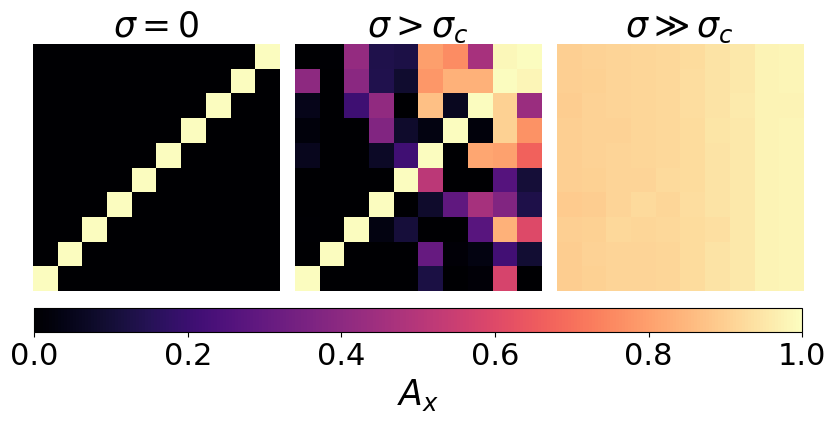

In [338]:
import pandas as pd
import numpy as np

folder = '/Users/lluisarolafernandez/desktop/COLLECTIVE_FIGS/data_collective_02_11_23'

# Number of matrices and runs
num_matrices = 50
num_runs = 10

crossaccuracy_matrices = []
crossaccuracy_matrices1 = []
crossaccuracy_matrices2 = []

# Loop over each matrix index
for i in range(num_matrices):
    # Initialize an empty list to store matrices for each run
    matrices_for_current_index = []
    matrices_for_current_index1 = []
    matrices_for_current_index2 = []
    
    # Loop over each run
    for run in range(1, num_runs + 1):
        # Construct the file name
        filename = f"{folder}/crossaccuracy_matrix_{i}_gamma_0001_depth_0_run_{run}_notadiabatic.csv"
        filename1 = f"{folder}/crossaccuracy_matrix_{i}_gamma_0001_depth_1_run_{run}_notadiabatic.csv"
        filename2 = f"{folder}/crossaccuracy_matrix_{i}_gamma_0001_depth_2_run_{run}_notadiabatic.csv"
        
        # Load the matrix from the CSV file
        matrix = pd.read_csv(filename).values
        matrix1 = pd.read_csv(filename1).values
        matrix2 = pd.read_csv(filename2).values
        
        # Append the matrix to the list
        matrices_for_current_index.append(matrix)
        matrices_for_current_index1.append(matrix1)
        matrices_for_current_index2.append(matrix2)
    
    # Average the matrices over the runs and append to the main list
    averaged_matrix = np.mean(matrices_for_current_index, axis=0)
    crossaccuracy_matrices.append(averaged_matrix)
    
    averaged_matrix1 = np.mean(matrices_for_current_index1, axis=0)
    crossaccuracy_matrices1.append(averaged_matrix1)
    
    averaged_matrix2 = np.mean(matrices_for_current_index2, axis=0)
    crossaccuracy_matrices2.append(averaged_matrix2)
    
    


# Assuming you have your crossaccuracy_matrices list already computed

# Indices of the three specific sigma values you want to plot
sigma_indices = [0,23,47]  # Replace with the actual indices

#order = np.argsort(np.mean(crossaccuracy_matrices[49], axis=0))
#print(order)

# Depth you want to plot
depth = 1  # Replace with the desired depth

# Find the maximum value across all confusion matrices
max_value = 1 #np.max([np.max(cm) for cm in crossaccuracy_matrices])

# Visualize the matrices for the specific sigma values and depth
plt.figure(figsize=(8, 8))
#plt.suptitle("Cross-Accuracy matrix for specific sigma values")

mappables = []  # List to store the mappable objects

for i, sigma_index in enumerate(sigma_indices):
    # First row: Without sorting
    ax1 = plt.subplot(1, 3, i + 1)
    order = np.argsort(np.mean(crossaccuracy_matrices1[47], axis=0))
    print(order)
    reordered_matrix = crossaccuracy_matrices1[sigma_index][order][:, order]
    mappable = ax1.imshow(reordered_matrix, cmap="magma", vmin=0, vmax=max_value)
    mappables.append(mappable)
    if i== 0: 
        ax1.set_title('$\sigma = 0$',fontsize=25)
    if i == 1:
        ax1.set_title('$\sigma > \sigma_c$',fontsize=25)
    if i ==2: 
        ax1.set_title('$\sigma \gg \sigma_c$',fontsize=25)
        
    #ax1.set_title(f"Coupling: {vec_sigma[sigma_index]:.2f}")
    ax1.invert_yaxis()  # Invert the x-axis
    ax1.axis('off')

# Add a common colorbar below the figures
cax1 = plt.axes([0.02, 0.37, 0.96, 0.03])  # Adjust position as needed
cbar = plt.colorbar(mappable=mappables[-1], cax=cax1, orientation='horizontal')
cbar.set_label('$A_x$', size=25)  # Set label size
cbar.ax.tick_params(labelsize=22)  # Set tick label size

plt.tight_layout(rect=[0, 0.2, 1, 0.95])  # Adjust layout to accommodate the colorbars
plt.show()

### RANK ONE APPROXIMATION VALIDATION

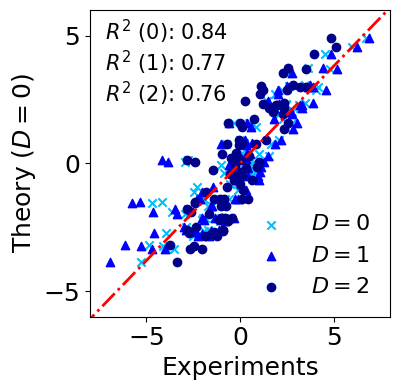

In [251]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
num_models = 10
num_sigma = 50
sum_matrix = np.zeros((num_models,num_models))
sum_matrix1 = np.zeros((num_models,num_models))
sum_matrix2 = np.zeros((num_models,num_models))
for s in range(num_sigma):
    sum_matrix += crossaccuracy_matrices[s]
    sum_matrix1 += crossaccuracy_matrices1[s]
    sum_matrix2 += crossaccuracy_matrices2[s]

# SVD decomposition
U, S, Vt = np.linalg.svd(sum_matrix)

# Rank-one approximation
rank_one_approx = S[0] * np.outer(U[:, 0], Vt[0, :])

# Create indices for rows and columns excluding the diagonal
rows, cols = np.indices((num_models, num_models))
off_diag_indices = rows != cols

# Get the flattened array of off-diagonal elements
empirical_D0 = sum_matrix[off_diag_indices]
empirical_D1 = sum_matrix1[off_diag_indices]
empirical_D2 = sum_matrix2[off_diag_indices]
rankone_D0 = rank_one_approx[off_diag_indices]

# Create a new figure with a size that can accommodate both subplots
plt.figure(figsize=(4.1,4))

#plt.title("Validation (MNIST)", fontsize=15)
plt.xlabel("Experiments", fontsize=18)
plt.ylabel("Theory ($D=0$)", fontsize=18)

empirical_matrices = [empirical_D0, empirical_D1, empirical_D2]
colors = ['deepskyblue','blue', 'darkblue']
markers = ['x','^','o']
names = ['$D = 0$','$D=1$','$D=2$']

all_empirical = []  # To store all empirical data for the best fit line
correlation_coefficients = []  # To store R^2 values

# Plot the scatter plots in your desired order
for empirical, color, marker, name in zip(empirical_matrices, colors, markers, names):
    plt.scatter(empirical - np.mean(empirical), rankone_D0 - np.mean(rankone_D0),color=color, marker=marker, label=name)

    # Append empirical data for the best fit line
    all_empirical.extend(empirical)

    # Calculate and store the correlation coefficient
    correlation_matrix = np.corrcoef(empirical, rankone_D0)
    correlation_coefficients.append(correlation_matrix[0, 1] ** 2)

    
empirical_all = (empirical_D0+empirical_D1+empirical_D2)/3
# Plot the best fit line using empirical_D0 data
coefficients = np.polyfit(empirical_D0 - np.mean(empirical_D0), rankone_D0 - np.mean(rankone_D0), 1)
polynomial = np.poly1d(coefficients)
x_vals = np.linspace(min(empirical_D0 - np.mean(empirical_D0))-10, 10+max(empirical_D0 - np.mean(empirical_D0)), 100)
plt.plot(x_vals, polynomial(x_vals),color='red',linestyle='-.', linewidth=2)


#fig = plt(figsize=(5, 5))  # Rows for gammas, columns for metrics
# Display R^2 with larger font


fontsize_val = 15
plt.gca().text(0.05, 0.90, f"$R^2$ $(0)$: {correlation_coefficients[0]:.2f}", color='k', transform=plt.gca().transAxes, fontsize=fontsize_val)
plt.gca().text(0.05, 0.80, f"$R^2$ $(1)$: {correlation_coefficients[1]:.2f}", color='k', transform=plt.gca().transAxes, fontsize=fontsize_val)
plt.gca().text(0.05, 0.70, f"$R^2$ $(2)$: {correlation_coefficients[2]:.2f}", color='k', transform=plt.gca().transAxes, fontsize=fontsize_val)
x_ticks = [-5,0,5]
y_ticks = [-5,0,5]
plt.xticks(x_ticks,fontsize=18)
plt.yticks(y_ticks,fontsize=18)
plt.xlim(-8,8)
plt.ylim(-6,6)
#plt.title('$S_x$ matrix',fontsize=19)
# Tight layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])
plt.legend(loc='lower right', frameon=False, fontsize=16)
# Show the plots
plt.show()